# Assignment-Bayes Theorem

1. State and prove Bayes Theorem. Explain all the intermediate steps and theorems.

2. Explain the significance of Bayes theorem and for what type of problems it is helpful.

3. Explain Naive Bayes classifier and training process.

4. Explain Email span filtering and how Bayes theorem can be helpful.

## Bayes Theorem

  Bayes theorem is one of the most popular machine learning concepts that helps to determine the probability of an event with random knowledge.It is used to calculate the probability of occurring one event while other one already occurred.It is a best method to relate the condition probability and marginal probability.

The formula for Bayes theorem is:

                P(A|B) = P(A ∩ B) / P(B)  
                P(A|B) = P(B|A)P(A) / P(B) 

      Where A and B are two events
      P(A) is the independent probability of A
      P(B) is the independent probability of B
      P(A|B) is the probability of event A given B
      P(B|A) is the probability of event B given A.


* **Class prior or prior probability:** probability of event A occurring before knowing anything about event B.
* **Predictor prior or evidence:** same as class prior but for event B.
* **Posterior probability:** probability of event A after learning about event B.
* **Likelihood:** reverse of the posterior probability.

Bayes Theorem can be written as:

             posterior = likelihood * prior / evidence




## Significance of Bayes theorem and Use-Cases

* Bayes' Theorem allows you to update the predicted probabilities of an event by incorporating new information.
*  It is often employed in finance in calculating or updating risk evaluation
*   Applications of Bayes' Theorem are widespread and not limited to the financial sector. 

For example, Bayes' theorem can be used to determine the accuracy of medical test results by taking into consideration how likely any given person is to have a disease and the general accuracy of the test






## Naive Bayes classifier

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification algorithms based on Bayes Theorem.Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. 

**Types of Naive Bayes Classifier:**
1. ***Multinomial Naive Bayes:***
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.
2. ***Bernoulli Naive Bayes:***
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.
3. ***Gaussian Naive Bayes:***
The Gaussian Naive Bayes is employed when the predictor values are continuous and are expected to follow Gaussian distribution or Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values.


**Training Process:**

1. Loading Initial Libraries
2. Importing Dataset
3. Exploring Dataset(EDA)
4. Visualizing on Dataset
5. Preprocessing/Data Normalization
6. Train and Test Splitting 
7. Model Training and prediciton
8. Model accuracy and metrics



## Analysing Email span filtering by using Bayes theorem

### Implementation of Multinomial Naive Bayes classifier and Gaussian Naive Bayes classifier using scikit-learn 

In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,mean_squared_error,classification_report

In [2]:
data = pd.read_csv('spam_ham_dataset.csv',encoding='utf-8')
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [3]:
data = data[["label","text","label_num"]]
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.shape

(5171, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [6]:
data.isna().sum()

label        0
text         0
label_num    0
dtype: int64

In [7]:
print(data["label"].value_counts())
print(data["label_num"].value_counts())

ham     3672
spam    1499
Name: label, dtype: int64
0    3672
1    1499
Name: label_num, dtype: int64


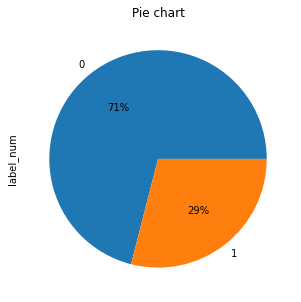

In [8]:
plt.figure(figsize=(5,5))
count=data["label_num"].value_counts()
count.plot(kind='pie',autopct='%1.0f%%')
plt.title('Pie chart')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


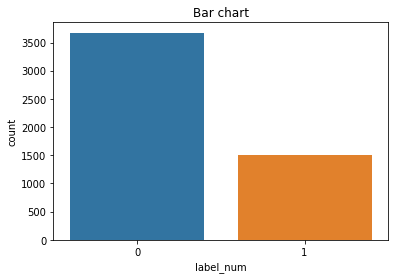

In [9]:
sns.countplot(data["label_num"]);
plt.title('Bar chart')
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
all_stopwords = stopwords.words('english')
len(all_stopwords)

179

In [12]:
def preprocessing(text):
  token= re.sub(r'http\S+', ' ',text)
  #remove html tags
  token= re.sub(r'<.*?>',' ', token) 
  #remove digits
  token= re.sub(r'\d+',' ', token)
  token = token.replace("Subject:"," ")
  clean_text = re.sub('[^a-zA-Z]', ' ', token)
  clean_text = re.sub('\r',' ',clean_text)
  clean_text = re.sub('\n',' ',clean_text) 
  clean_text = clean_text.lower()
  clean_text = clean_text.split()
  clean_text = [word for word in clean_text if word not in all_stopwords]
  clean_text  = ' '.join(clean_text)
  return clean_text 

In [13]:
data['clean_text']=data['text'].map(preprocessing)

In [14]:
print(data['text'][5])
print(data['clean_text'][5])

Subject: ehronline web address change
this message is intended for ehronline users only .
due to a recent change to ehronline , the url ( aka " web address " ) for accessing ehronline needs to be changed on your computer . the change involves adding the letter " s " to the " http " reference in the url . the url for accessing ehronline should be : https : / / ehronline . enron . com .
this change should be made by those who have added the url as a favorite on the browser .
ehronline web address change message intended ehronline users due recent change ehronline url aka web address accessing ehronline needs changed computer change involves adding letter http reference url url accessing ehronline ehronline enron com change made added url favorite browser


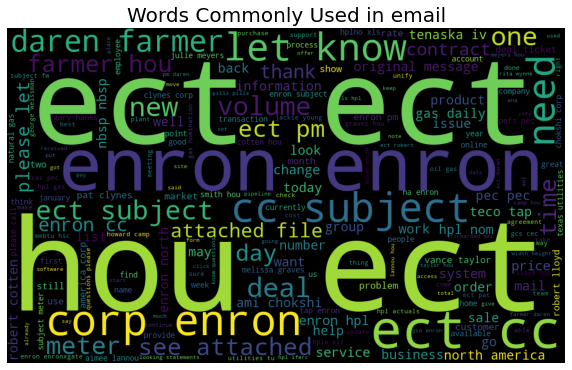

In [15]:
plt.figure(figsize=(10, 10))
text = data['clean_text'].str.cat(sep=' ')
wc = WordCloud(width=1000, height=600, background_color="black")
wc.generate_from_text(text)
plt.imshow(wc)
plt.axis("off")
plt.title(f"Words Commonly Used in email", size=20)
plt.show()

In [16]:
x = np.array(data['clean_text'])
y = np.array(data["label"])

In [17]:
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3878, 45597)
(1293, 45597)
(3878,)
(1293,)


Multinomial Naive Bayes classifier 

In [19]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
MNB_pred=MNB.predict(X_test)

********************CLASSIFICATION REPORT********************
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       930
        spam       0.95      0.96      0.95       363

    accuracy                           0.97      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.97      0.97      0.97      1293


ACCURACY :  0.9729311678267595

********************CONFUSION MATRIX********************


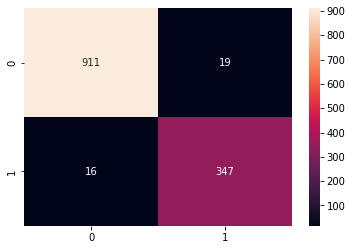

In [20]:
print("*"*20+"CLASSIFICATION REPORT"+"*"*20)
print(classification_report(y_test,MNB_pred))
print("\n"+"ACCURACY : ",accuracy_score(y_test,MNB_pred))
print("\n"+"*"*20+"CONFUSION MATRIX"+"*"*20)
sns.heatmap(confusion_matrix(y_test,MNB_pred),annot = True, fmt="d");

Gaussian Naive Bayes classifier

In [21]:
GNB = GaussianNB()
GNB.fit(X_train.toarray(),y_train)
GNB_pred=GNB.predict(X_test.toarray())

********************CLASSIFICATION REPORT********************
              precision    recall  f1-score   support

         ham       0.96      0.99      0.97       930
        spam       0.96      0.90      0.93       363

    accuracy                           0.96      1293
   macro avg       0.96      0.94      0.95      1293
weighted avg       0.96      0.96      0.96      1293


ACCURACY :  0.9621036349574633

********************CONFUSION MATRIX********************


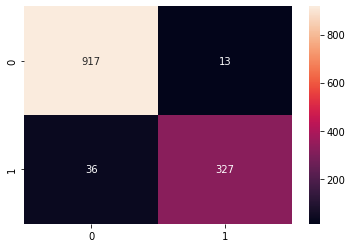

In [22]:
print("*"*20+"CLASSIFICATION REPORT"+"*"*20)
print(classification_report(y_test,GNB_pred))
print("\n"+"ACCURACY : ",accuracy_score(y_test,GNB_pred))
print("\n"+"*"*20+"CONFUSION MATRIX"+"*"*20)
sns.heatmap(confusion_matrix(y_test,GNB_pred),annot = True, fmt="d");